<IPython.core.display.Javascript object>


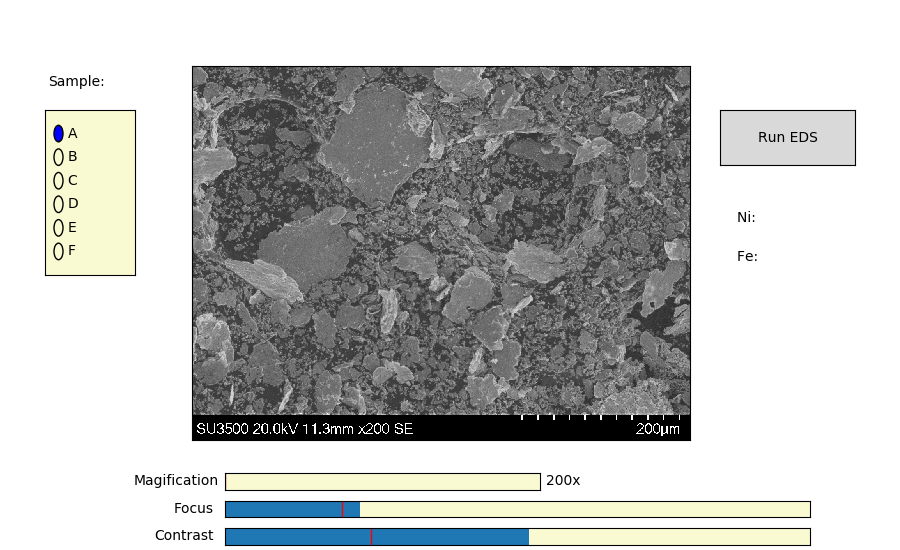

In [23]:
%matplotlib notebook

import VirtualSEMfuncs.SEMfuncs as sem
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.widgets import Slider, Button, RadioButtons
from time import sleep
fig1 = plt.figure(figsize=(9,5.5))
ax1 = fig1.add_subplot(1,1,1)
fig1.subplots_adjust(bottom=0.2, left=0.08)

#Initial contrast setting
vmin0 = 25
vmax0 = 130

#Initial sample
img0 = mpimg.imread('SEMimages/A1.tif')
img0=sem.adjust_contrast(img0, vmin0, vmax0)
img0 = sem.adjust_focus(img0, 3)
impgplot = plt.imshow(img0)


#Magnifification at which samples are displayed
mags = [[500, 1000, 1500, 2500], [40,50,100,100], [200, 750, 1500, 2500], [100, 230, 600, 1000], 
        [40, 85, 100, 500], [100,120,200,500]]


#Order of samples with sample names, used for assigning magnifications
sampDict = dict(zip(['D', 'F', 'A', 'C', 'B', 'E'],np.arange(6)))

ni_vals = [100, 96.5, 99.1, 100, 98.9, 99.4]
fe_vals = [0, 3.5, 0.9, 0, 1.1, 0.6]
#Graph properties
ax1.set(xticks=[], yticks=[])
ax1.text(-370, 50, 'Sample:')
ni = ax1.text(1400, 400, 'Ni: ')
fe = ax1.text(1400, 500, 'Fe: ')

# Magnification Slider
axcolor = "lightgoldenrodyellow"
axmag = plt.axes([0.25, 0.11, 0.35, 0.03], facecolor=axcolor)
smag = Slider(axmag, 'Magification', 200, 203, valinit=1, valstep=1, valfmt='%.0fx')

# Contrast Slider
axcon = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor=axcolor)
scon = Slider(axcon, 'Contrast', 0, 100, valinit=25, valstep=1, valfmt='')

#Focus slider
axfoc = plt.axes([0.25, 0.06, 0.65, 0.03], facecolor=axcolor)
sfoc = Slider(axfoc, 'Focus', 0, 100, valinit=20, valstep=1, valfmt='')
  
#Radio buttons - Choose sample
#samp='D'
rax = plt.axes([0.05, 0.5, 0.1, 0.3], facecolor=axcolor)
radio1 = RadioButtons(rax, ('A', 'B', 'C', 'D', 'E', 'F'))

#EDS button
axeds = plt.axes([0.8, 0.7, 0.15, 0.1])
eds = Button(axeds, 'Run EDS')

def update(val):
    #Set image number
    mag = int(smag.val)-199
    
    #Select sample
    samp = radio1.value_selected
    
    #Actual mag value
    magVal = mags[sampDict[samp]][mag-1]
    
    #Set focus value and range
    focV = sfoc.val
    fmin = mag*3
    fmax = 15 - 3*mag
    sig = abs(fmin-(fmax+fmin)/100*focV)
    
    #Set contrast value and range
    conV = scon.val
    vmin = (100-conV)
    vmax = 255-(100-conV)
    
    #s2=radio1.value_selected
    fn = 'SEMimages/{}{}.tif'.format(samp,int(mag))
    #fn = 'SEMimages/B2.tif'
    
    smag.valtext.set_text('{}x'.format(magVal))
    img = mpimg.imread(fn)
    img = sem.adjust_contrast(img, vmin, vmax)
    img = sem.adjust_focus(img, sig)

    #Set content % back to blank    
    ni.set_text('Ni: ')
    fe.set_text('Fe: ')
    
    impgplot.set_data(img)
    fig1.canvas.draw_idle()

def run_eds(event):
    samp = radio1.value_selected
    ni_con = ni_vals[sampDict[samp]]
    fe_con = fe_vals[sampDict[samp]]
    ni.set_text('Ni: {}%'.format(ni_con))
    fe.set_text('Fe: {}%'.format(fe_con))
    
eds.on_clicked(run_eds)
    
    
smag.on_changed(update)
scon.on_changed(update)
sfoc.on_changed(update)
radio1.on_clicked(update)
plt.show()